In [16]:
# Import libraries and dataframes
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

dataset = "asset_class" # Values: asset_class, sectors, ftse

quant_res_df = pd.read_csv("ResultCSVs/structbal_quant_%s_res.csv"%(dataset))

quant_res_df = quant_res_df.drop(axis=1, columns=['Unnamed: 0'])

In [ ]:
quant_res_df.shape

In [ ]:
# Plot graph density for each threshold. 

thresh_array = quant_res_df['threshold'].unique()

density_distr = []

for thresh in thresh_array:
    density = quant_res_df[quant_res_df.threshold == thresh]['density']
    density_distr.append(density)
    
plt.boxplot(density_distr, labels=[float('%.2f'%x) for x in thresh_array])
plt.ylabel("Graph Density")
plt.xlabel("Correlation Threshold")
plt.title("%s Density vs Threshold" % (dataset))
plt.show()

<Figure size 432x288 with 0 Axes>

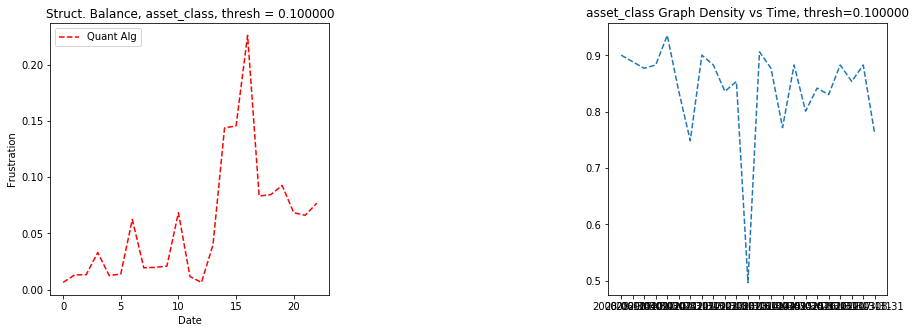

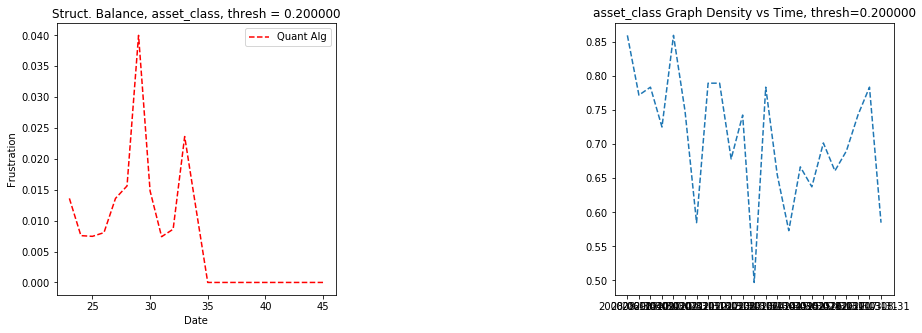

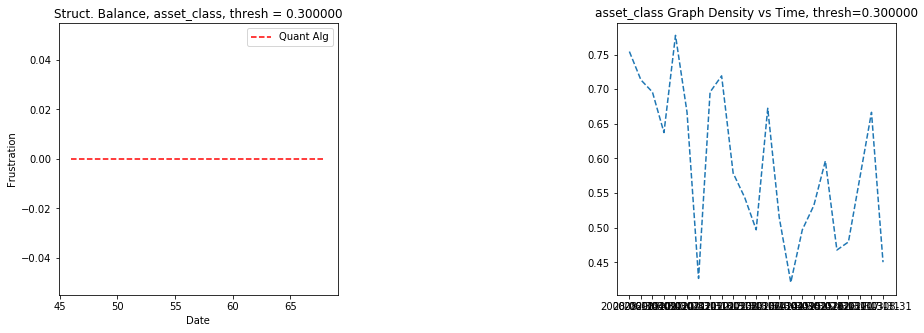

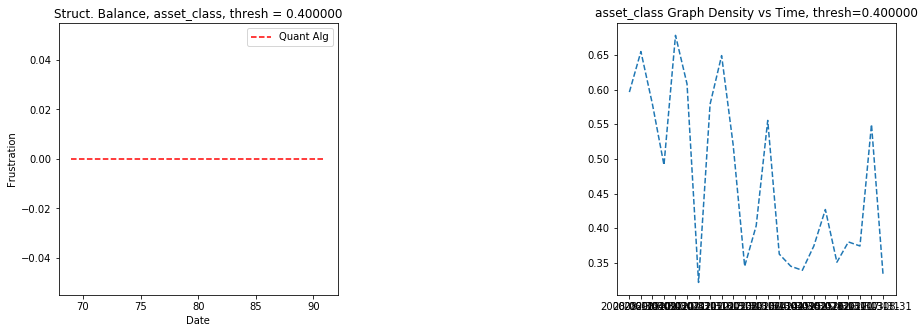

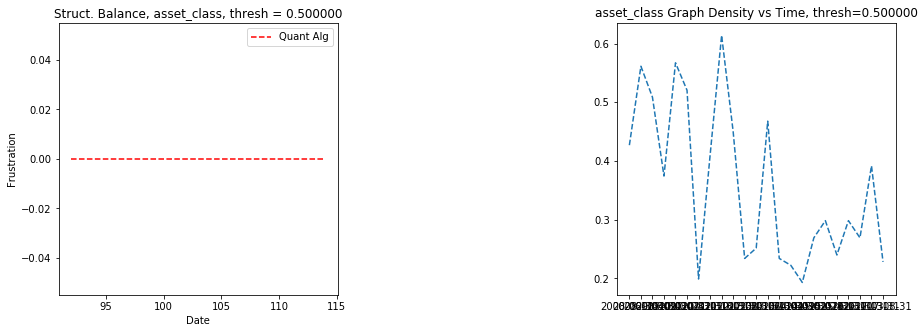

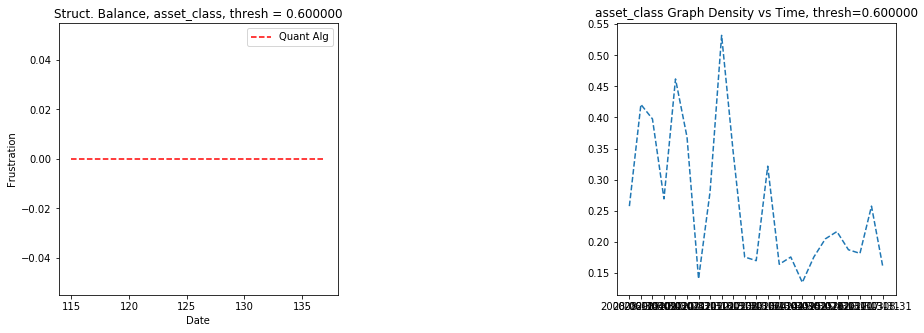

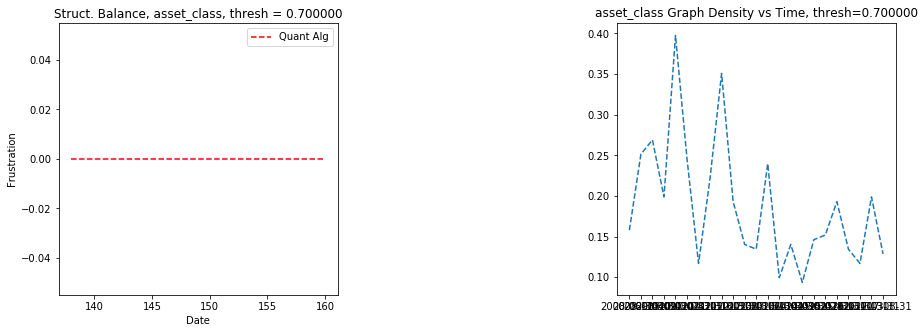

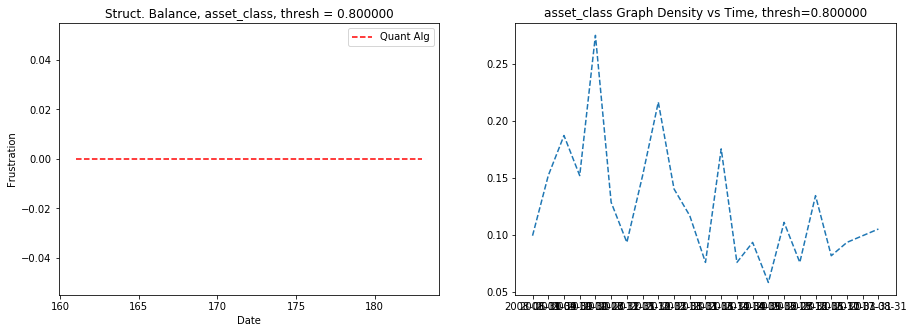

In [17]:
# Plot score vs time for each threshold
import json
thresholds = quant_res_df['threshold'].unique()

i = 1
for thresh in thresholds:
    quant_series = quant_res_df[(quant_res_df.threshold == thresh)]
        
    fig = plt.figure(i)
    plt.subplots_adjust(wspace=1)
    plt.subplots(figsize=(15,5))
    
    plt.subplot(121)
    plt.title('Struct. Balance, %s, thresh = %f' % (dataset, thresh))
    plt.ylabel('Frustration')
    plt.xlabel('Date')
    
    plt.plot(quant_series['frustration_score'], 'r--', label='Quant Alg')
    plt.legend(loc=0)
    
    plt.subplot(122)
    plt.title('%s Graph Density vs Time, thresh=%f' % (dataset, thresh))
    plt.plot(quant_series['date'], quant_series['density'], '--')
    
    i += 1

<Figure size 432x288 with 0 Axes>

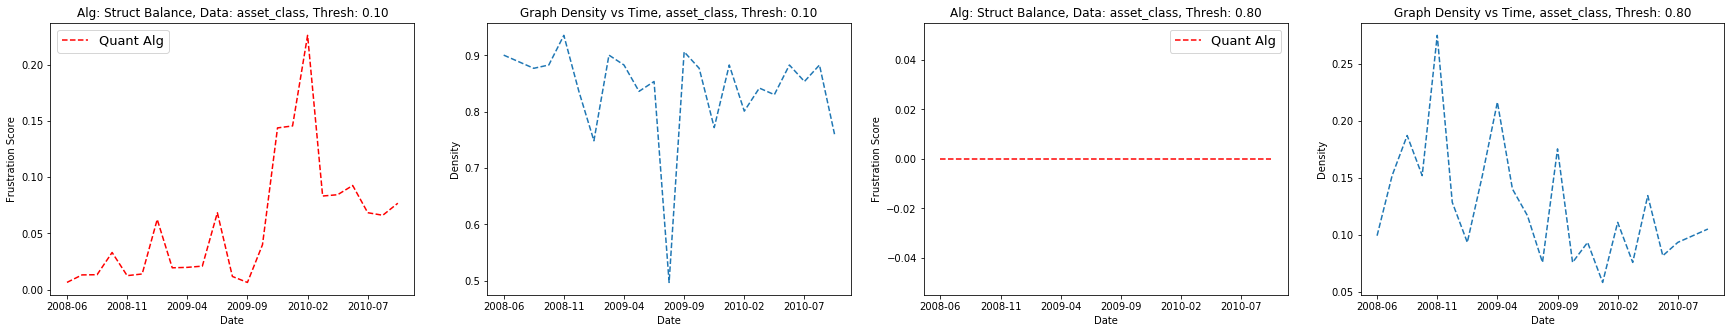

In [18]:
# Plot score vs time for each threshold
thresholds = quant_res_df['threshold'].unique()
low_thresh = thresholds[0]
high_thresh = thresholds[7]

quant_series = quant_res_df[(quant_res_df.threshold == low_thresh)]

fig = plt.figure(1)
plt.subplots(figsize=(30,5))

plt.subplot(141)
plt.title('Alg: Struct Balance, Data: %s, Thresh: %.2f' % (dataset, low_thresh))
plt.ylabel('Frustration Score')
plt.xlabel('Date')

plt.plot(quant_series["date"], quant_series['frustration_score'], 'r--', label='Quant Alg')
plt.legend(loc=0, prop={'size': 13})
plt.xticks(ticks=quant_series['date'][::4], 
          labels=[x[0:7] for x in quant_series['date']])

plt.subplot(142)
plt.title('Graph Density vs Time, %s, Thresh: %.2f' % (dataset, low_thresh))
plt.plot(quant_series['date'], quant_series['density'], '--')
plt.xticks(ticks=quant_series['date'][::4], 
          labels=[x[0:7] for x in quant_series['date']])
plt.ylabel("Density")
plt.xlabel("Date")


quant_series = quant_res_df[(quant_res_df.threshold == high_thresh)]

plt.subplot(143)
plt.title('Alg: Struct Balance, Data: %s, Thresh: %.2f' % (dataset, high_thresh))
plt.ylabel('Frustration Score')
plt.xlabel('Date')

plt.plot(quant_series["date"], quant_series['frustration_score'], 'r--', label='Quant Alg')
plt.legend(loc=0, prop={'size': 13})
plt.xticks(ticks=quant_series['date'][::4], 
          labels=[x[0:7] for x in quant_series['date']])

plt.subplot(144)
plt.title('Graph Density vs Time, %s, Thresh: %.2f' % (dataset, high_thresh))
plt.plot(quant_series['date'], quant_series['density'], '--')
plt.xticks(ticks=quant_series['date'][::4], 
          labels=[x[0:7] for x in quant_series['date']])
plt.ylabel("Density")
plt.xlabel("Date")

plt.savefig('../ReportFiguresPlots/StructBalance/sb_%s_score_density' % (dataset))

In [7]:
all_quant_df = all_quant_df.groupby(["density"])["frustration_score"].mean()

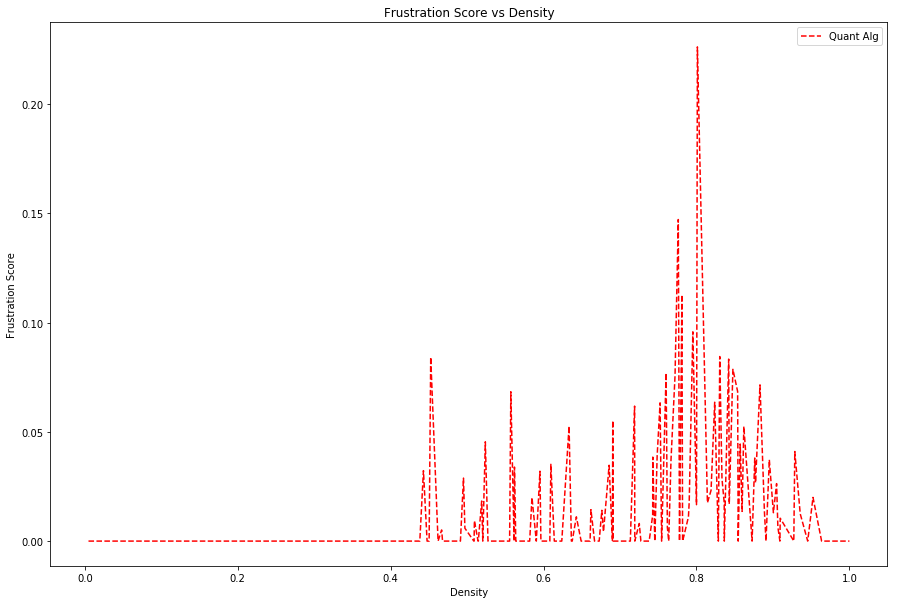

In [9]:
fig = plt.figure(1, figsize=(15,10))
plt.plot(all_quant_df, 'r--', label='Quant Alg')
plt.title("Frustration Score vs Density")
plt.ylabel("Frustration Score")
plt.xlabel("Density")
plt.legend(loc=0)
plt.show()
fig.savefig("../ReportFiguresPlots/structbal_density_all.png")